<a href="https://colab.research.google.com/github/1jlal/Coursera_Capstone/blob/master/Berlin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import folium
import json
import requests

In [5]:
from google.colab import files
uploaded = files.upload()

Saving berlin_bezirke.csv to berlin_bezirke.csv
Saving berlin_bezirke.geojson to berlin_bezirke.geojson
Saving berlin_bezirke.topojson to berlin_bezirke.topojson
Saving berlin_postleitzahlen.cpg to berlin_postleitzahlen.cpg
Saving berlin_postleitzahlen.dbf to berlin_postleitzahlen.dbf
Saving berlin_postleitzahlen.prj to berlin_postleitzahlen.prj
Saving berlin_postleitzahlen.qpj to berlin_postleitzahlen.qpj
Saving berlin_postleitzahlen.shp to berlin_postleitzahlen.shp
Saving berlin_postleitzahlen.shx to berlin_postleitzahlen.shx
Saving berlin_postleitzahlen.topojson to berlin_postleitzahlen.topojson


In [6]:
ber_crimes = pd.read_csv('Berlin_crimes.csv')
ber_crimes

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218


In [7]:
ber_crime19 = ber_crimes[ber_crimes['Year'] == 2019]
ber_crime19 = ber_crime19.reset_index(drop=True)
ber_crime19

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2019,Mitte,10111,Tiergarten Süd,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980
1,2019,Mitte,10112,Regierungsviertel,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057
2,2019,Mitte,10113,Alexanderplatz,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,2019,Mitte,10114,Brunnenstraße Süd,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902
4,2019,Mitte,10221,Moabit West,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728
146,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986
147,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212
148,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218


In [10]:
pip install geocoder

     |████████████████████████████████| 102kB 4.0MB/s 


In [11]:
import geocoder

In [12]:
latitude=[]
longitude=[]
for code in ber_crime19['Location']:
    g = geocoder.arcgis('{}, Berlin'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Berlin'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

Tiergarten Süd [52.509930000000054, 13.363930000000039]
Regierungsviertel [52.512060000000076, 13.384110000000021]
Alexanderplatz [52.52209000000005, 13.410910000000058]
Brunnenstraße Süd [52.535243826619805, 13.39793059063682]
Moabit West [52.52570000000003, 13.340050000000076]
Moabit Ost [52.52570000000003, 13.340050000000076]
Osloer Straße [52.55544488462937, 13.391430042488397]
Brunnenstraße Nord [52.535243826619805, 13.39793059063682]
Parkviertel [52.46513463743084, 13.156739629783107]
Wedding Zentrum [52.54781000000003, 13.354730000000075]
Bezirk (Mi), nicht zuzuordnen [52.51604000000003, 13.376910000000066]
Südliche Friedrichstadt [52.52392000000003, 13.388820000000067]
Tempelhofer Vorstadt [52.46076000000005, 13.385630000000049]
nördliche Luisenstadt [52.56417909959258, 13.32167556180648]
südliche Luisenstadt [52.51604000000003, 13.376910000000066]
Karl-Marx-Allee-Nord [52.52112857143598, 13.419835258691261]
Karl-Marx-Allee-Süd [52.52112857143598, 13.419835258691261]
Frankfurte

In [13]:
coord_data = [latitude, longitude] 
coord_labels = ['Latitude', 'Longitude']
coord_df = pd.DataFrame(coord_data).T
coord_df.columns = coord_labels
coord_df.head()

,Latitude,Longitude
0,52.509930,13.363930
1,52.512060,13.384110
2,52.522090,13.410910
3,52.535244,13.397931
4,52.525700,13.340050


In [14]:
# ber_crime = pd.merge(ber_crime19, coord_df, how='right', on='Code')
# ber_crime
bercrime = pd.concat([ber_crime19, coord_df], axis=1)
bercrime

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Latitude,Longitude
0,2019,Mitte,10111,Tiergarten Süd,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980,52.509930,13.363930
1,2019,Mitte,10112,Regierungsviertel,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057,52.512060,13.384110
2,2019,Mitte,10113,Alexanderplatz,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813,52.522090,13.410910
3,2019,Mitte,10114,Brunnenstraße Süd,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902,52.535244,13.397931
4,2019,Mitte,10221,Moabit West,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409,52.525700,13.340050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728,52.606340,13.320500
146,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986,52.596800,13.358310
147,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212,52.479661,13.436956
148,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218,52.564580,13.317590


In [15]:
bercrime = bercrime[['Year', 'District', 'Code', 'Location', 'Latitude', 'Longitude', 'Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local']]
bercrime.head()

,Year,District,Code,Location,Latitude,Longitude,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2019,Mitte,10111,Tiergarten Süd,52.509930,13.363930,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980
1,2019,Mitte,10112,Regierungsviertel,52.512060,13.384110,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057
2,2019,Mitte,10113,Alexanderplatz,52.522090,13.410910,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,2019,Mitte,10114,Brunnenstraße Süd,52.535244,13.397931,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902
4,2019,Mitte,10221,Moabit West,52.525700,13.340050,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409


In [16]:
bercrime['Total_crimes'] = bercrime[['Robbery', 'Street_robbery', 'Injury', 'Agg_assault', 'Threat', 'Theft', 'Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local']].sum(1)
bercrime

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,District,Code,Location,Latitude,Longitude,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total_crimes
0,2019,Mitte,10111,Tiergarten Süd,52.509930,13.363930,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980,5169
1,2019,Mitte,10112,Regierungsviertel,52.512060,13.384110,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057,7064
2,2019,Mitte,10113,Alexanderplatz,52.522090,13.410910,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813,22810
3,2019,Mitte,10114,Brunnenstraße Süd,52.535244,13.397931,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902,4594
4,2019,Mitte,10221,Moabit West,52.525700,13.340050,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409,6889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,52.606340,13.320500,34,19,372,85,123,1160,30,135,150,93,16,3,306,74,110,728,3438
146,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,52.596800,13.358310,42,22,491,123,187,1100,51,224,76,40,39,19,286,11,73,986,3770
147,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,52.479661,13.436956,6,4,84,19,34,293,13,36,18,34,5,2,156,56,21,212,993
148,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,52.564580,13.317590,8,4,95,18,43,492,21,96,69,38,6,1,79,8,31,218,1227


In [17]:
# from google.colab import drive
# drive.mount('drive')

In [18]:
# bercrime.to_csv('berlin_crime2019.csv')
# !cp berlin_crime2019.csv "drive/My Drive/"

In [19]:
from folium import plugins

In [20]:
berlin_lat = 52.520008
berlin_lng = 13.404954

berlin_map = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=11)

In [21]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the crimes and add each to the incidents feature group
for lat, lng, in zip(bercrime.Latitude, bercrime.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
berlin_map.add_child(incidents)

In [22]:
'''
# let's start again with a clean copy of the map
berlin_map = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(berlin_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(bercrime.Longitude, bercrime.Latitude, bercrime.Total_crimes):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
berlin_map

'''

"\n# let's start again with a clean copy of the map\nberlin_map = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=11)\n\n# instantiate a mark cluster object for the incidents in the dataframe\nincidents = plugins.MarkerCluster().add_to(berlin_map)\n\n# loop through the dataframe and add each data point to the mark cluster\nfor lat, lng, label in zip(bercrime.Longitude, bercrime.Latitude, bercrime.Total_crimes):\n    folium.Marker(\n        location=[lat, lng],\n        icon=None,\n        popup=label,\n    ).add_to(incidents)\n\n# display map\nberlin_map\n\n"

In [24]:
bercrime_grouped = pd.DataFrame(bercrime.groupby('District')['Total_crimes'].sum(1)).reset_index()
bercrime_grouped.columns=['name','Crimes']
bercrime_grouped

,name,Crimes
0,Charlottenburg-Wilmersdorf,54589
1,Friedrichshain-Kreuzberg,67008
2,Lichtenberg,32239
3,Marzahn-Hellersdorf,26447
4,Mitte,85149
5,Neukölln,50875
6,Pankow,44664
7,Reinickendorf,27846
8,Spandau,26872
9,Steglitz-Zehlendorf,29080


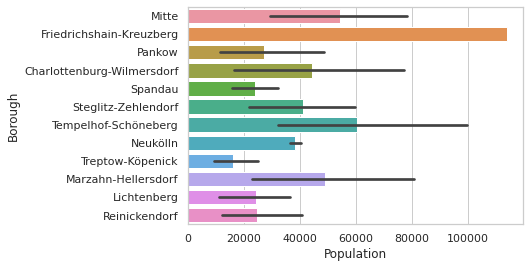

In [100]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(y='Borough',x='Population', data=boroughs)

In [29]:
boroughs = pd.read_csv('neighborhoods_berlin.csv', encoding= 'unicode_escape')
boroughs.rename(columns={'Borough':'name'}, inplace=True)
boroughs.dropna(inplace=True)
boroughs

,name,Neighborhood,Area(km-sq),Population,Density(per km-sq)
0,Mitte,Mitte,10.70,79582.0,7445.0
1,Mitte,Moabit,7.72,69425.0,8993.0
2,Mitte,Hansaviertel,0.53,5889.0,11111.0
3,Mitte,Tiergarten,5.17,12486.0,2415.0
4,Mitte,Wedding,9.23,76363.0,8273.0
...,...,...,...,...,...
90,Reinickendorf,Hermsdorf,6.10,16503.0,2705.0
91,Reinickendorf,Waidmannslust,2.30,10022.0,4357.0
92,Reinickendorf,Lübars,5.00,4915.0,983.0
94,Reinickendorf,Märkisches Viertel,3.20,35206.0,11002.0


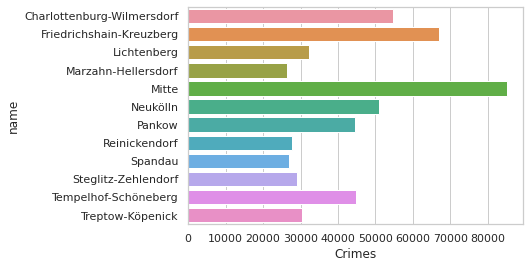

In [101]:
ax1 = sns.barplot(y='name', x='Crimes', data=bercrime_grouped)

In [30]:
berlin_geo = r'berlin_bezirke.geojson' # geojson file

# create a plain map of berlin
berlin_map = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=12, tiles='CartoDB Positron')
# berlin_map

In [31]:
crime_scale = (bercrime_grouped['Crimes'].quantile((0,0.16,0.32,0.50,0.76,1))).tolist()
# generate choropleth map using the total crimes in each district of Berlin
berlin_map.choropleth(
    geo_data=berlin_geo,
    data=bercrime_grouped,
    columns=['name','Crimes'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale=crime_scale,
    legend_name='Berlin Crimes in 2019',
)

# display map
berlin_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [32]:
berlin_geo = r'berlin_bezirke.geojson' # geojson file

# create a plain map of berlin
berlin_map_pop = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=12, tiles='CartoDB Positron')

In [33]:
pop_scale = (boroughs['Population'].quantile((0,0.16,0.32,0.50,0.76,1))).tolist()

# generate choropleth map using the total crimes in each district of Berlin
berlin_map_pop.choropleth(
    geo_data=berlin_geo,
    data=boroughs,
    columns=['name','Population'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale=pop_scale,
    legend_name='Berlin Population',
)

# display map
berlin_map_pop

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [34]:
lats=[]
longs=[]
for code in boroughs['Neighborhood']:
    g = geocoder.arcgis('{}, Berlin'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Berlin'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    lats.append(latlng[0])
    longs.append(latlng[1])

Mitte [52.52119000000005, 13.424140000000023]
Moabit [52.52570000000003, 13.340050000000076]
Hansaviertel [52.51679000000007, 13.338350000000048]
Tiergarten [52.509930000000054, 13.363930000000039]
Wedding [52.54781000000003, 13.354730000000075]
Gesundbrunnen [52.55619000000007, 13.377100000000041]
Friedrichshain [52.51402000000007, 13.454030000000046]
Prenzlauer Berg [52.54083000000003, 13.42575000000005]
Weißensee [52.56203000000005, 13.468390000000056]
Blankenburg [52.59332000000006, 13.458050000000071]
Heinersdorf [52.56770000000006, 13.439800000000048]
Karow [52.61418000000003, 13.469760000000065]
Stadtrandsiedlung Malchow [52.57038000000006, 13.463420000000042]
Pankow [52.56925000000007, 13.402480000000025]
Blankenfelde [52.61855000000003, 13.390170000000069]
Buch [52.634240000000034, 13.49753000000004]
Französisch Buchholz [52.608220000000074, 13.433680000000038]
Niederschönhausen [52.58265000000006, 13.403620000000046]
Rosenthal [52.599770000000035, 13.377760000000023]
Wilhelms

In [35]:
coords = [lats, longs] 
coords_labels = ['Latitude', 'Longitude']
coords = pd.DataFrame(coords).T
coords.columns = coords_labels
coords.head()

,Latitude,Longitude
0,52.52119,13.42414
1,52.52570,13.34005
2,52.51679,13.33835
3,52.50993,13.36393
4,52.54781,13.35473


In [36]:
coords.shape

(85, 2)

In [46]:
boroughs['Latitude'] = coords['Latitude']
boroughs['Longitude'] = coords['Longitude']

In [47]:
boroughs.shape

(85, 7)

In [48]:
boroughs.tail()

,name,Neighborhood,Area(km-sq),Population,Density(per km-sq),Latitude,Longitude
80,Reinickendorf,Hermsdorf,6.10,16503.0,2705.0,52.61490,13.31783
81,Reinickendorf,Waidmannslust,2.30,10022.0,4357.0,52.60634,13.32050
82,Reinickendorf,Lübars,5.00,4915.0,983.0,52.62014,13.35525
83,Reinickendorf,Märkisches Viertel,3.20,35206.0,11002.0,52.59680,13.35831
84,Reinickendorf,Borsigwalde,2.03,6432.0,3168.0,52.58522,13.30788


In [75]:
# boroughs.reset_index(inplace=True, drop=True)
boroughs.rename(columns={'name':'Borough','Neighborhood':'Neighbourhood'}, inplace=True)
boroughs

,Borough,Neighbourhood,Area(km-sq),Population,Density(per km-sq),Latitude,Longitude
0,Mitte,Mitte,10.70,79582.0,7445.0,52.52119,13.42414
1,Mitte,Moabit,7.72,69425.0,8993.0,52.52570,13.34005
2,Mitte,Hansaviertel,0.53,5889.0,11111.0,52.51679,13.33835
3,Mitte,Tiergarten,5.17,12486.0,2415.0,52.50993,13.36393
4,Mitte,Wedding,9.23,76363.0,8273.0,52.54781,13.35473
...,...,...,...,...,...,...,...
80,Reinickendorf,Hermsdorf,6.10,16503.0,2705.0,52.61490,13.31783
81,Reinickendorf,Waidmannslust,2.30,10022.0,4357.0,52.60634,13.32050
82,Reinickendorf,Lübars,5.00,4915.0,983.0,52.62014,13.35525
83,Reinickendorf,Märkisches Viertel,3.20,35206.0,11002.0,52.59680,13.35831


In [50]:
berlin_map = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=12)

for lat, lng, hood in zip(boroughs['Latitude'], boroughs['Longitude'], boroughs['Neighborhood']):
    label = f'{hood}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(berlin_map)

berlin_map

# Exploring Neighborhoods in Berlin

## In this section I'll be using the Foursquare API to explore the neighbourhoods and segment them.

In [51]:

CLIENT_ID = 'KCOVE3SEDEMDU1505SOPFOSZWRS21MTPETWKXB5ZEF3PUFQA' # Foursquare ID
CLIENT_SECRET = '5FNX4DN4RG10KP4LHHQS3NCCKLVS2HFUX53FSDEWQPU33J55' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KCOVE3SEDEMDU1505SOPFOSZWRS21MTPETWKXB5ZEF3PUFQA
CLIENT_SECRET:5FNX4DN4RG10KP4LHHQS3NCCKLVS2HFUX53FSDEWQPU33J55


In [52]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
berlin_venues = getNearbyVenues(names=boroughs['Neighborhood'],
                                latitudes=boroughs['Latitude'],
                                longitudes=boroughs['Longitude']
                                )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
Stadtrandsiedlung Malchow
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld
Wilhelmstadt
Steglitz
Lichterfelde
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg
Friedenau
Mariendorf
 Lichtenrade
Britz
Buckow
Rudow
Gropiusstadt
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide
Altglienicke
Adlershof
Köpenick
Rahnsdorf
Grünau
Müggelheim
Schmöckwitz
Marzahn
Biesdorf
Kaulsdorf
Mahlsdorf
Hellersdorf
Friedrichsfelde
Karlshorst
Falkenberg
Malchow
Wartenberg
Neu-Hohenschönhausen
Alt-Hohenschönhausen
Fennpfuhl
Rummelsburg
Reinickendorf
Tegel
Heiligensee
Hermsdorf
Waidmannslust
Lübars
Märkisches Viertel
Borsigwalde


In [54]:
berlin_venues.shape

(1269, 7)

In [55]:
berlin_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.52119,13.42414,Kino International,52.520363,13.422849,Indie Movie Theater
1,Mitte,52.52119,13.42414,Fahrrad Flöckner I CUBE Bike Store,52.519152,13.424692,Bike Shop
2,Mitte,52.52119,13.42414,CAMP4,52.520032,13.421953,Outdoor Supply Store
3,Mitte,52.52119,13.42414,Ristorante a Mano,52.518772,13.427652,Italian Restaurant
4,Mitte,52.52119,13.42414,BoConcept,52.518643,13.426828,Furniture / Home Store


In [57]:
berlin_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Lichtenrade,5,5,5,5,5,5
Adlershof,11,11,11,11,11,11
Alt-Hohenschönhausen,7,7,7,7,7,7
Alt-Treptow,31,31,31,31,31,31
Altglienicke,4,4,4,4,4,4
...,...,...,...,...,...,...
Westend,6,6,6,6,6,6
Wilhelmsruh,4,4,4,4,4,4
Wilhelmstadt,5,5,5,5,5,5


In [58]:
print('There are {} unique categories'.format(len(berlin_venues['Venue Category'].unique())))

There are 229 unique categories


#### Analyzing each neighbourhood

Using one hot encoding I'll convert the categorical variables so they can be used for clustering later on.

In [59]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighbourhood column back to dataframe
berlin_onehot['Neighbourhood'] = berlin_venues['Neighbourhood']

# move neighbourhood column to first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Neighbourhood,ATM,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bavarian Restaurant,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,...,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Shop,Yemeni Restaurant,Yoga Studio
0,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mitte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
berlin_onehot.shape

(1269, 230)

Next, let's group rows, by neighbourhood, and by taking the mean of the frequency of each category.

In [61]:
berlin_grouped = berlin_onehot.groupby('Neighbourhood').mean().reset_index()
berlin_grouped

,Neighbourhood,ATM,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bavarian Restaurant,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Business Service,...,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Shop,Yemeni Restaurant,Yoga Studio
0,Lichtenrade,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,Adlershof,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.181818,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.181818,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,Alt-Hohenschönhausen,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.000000
3,Alt-Treptow,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064516,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0,0.000000,0.032258,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.000000
4,Altglienicke,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Westend,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
81,Wilhelmsruh,0.

In [62]:
berlin_grouped.shape

(85, 230)

Printing each neighborhood along with the top 5 most common venues.

In [63]:
num_top_venues = 5

for hood in berlin_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighbourhood']==hood].T.reset_index()
    temp.columns = ['Venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Lichtenrade----
              Venue  freq
0          Bus Stop   0.2
1  Asian Restaurant   0.2
2        Restaurant   0.2
3       Supermarket   0.2
4              Café   0.2


----Adlershof----
              Venue  freq
0       Supermarket  0.18
1      Tram Station  0.18
2      Home Service  0.09
3  Asian Restaurant  0.09
4        Steakhouse  0.09


----Alt-Hohenschönhausen----
                   Venue  freq
0              Drugstore  0.29
1          Big Box Store  0.14
2      Indian Restaurant  0.14
3  Vietnamese Restaurant  0.14
4                  Hotel  0.14


----Alt-Treptow----
              Venue  freq
0         Nightclub  0.06
1            Bakery  0.06
2          Bus Stop  0.06
3              Café  0.06
4  Tapas Restaurant  0.03


----Altglienicke----
              Venue  freq
0       Supermarket  0.50
1     Bowling Alley  0.25
2    Discount Store  0.25
3               ATM  0.00
4  Pedestrian Plaza  0.00


----Baumschulenweg----
         Venue  freq
0       Bakery  0.12
1     

Here's a function to sort the venues in descending order.

In [64]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Creating a dataframe of neighbourhoods with their top 10 most common venues.

In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append(f'{ind+1}{indicators[ind]} Most Common Venue')
    except:
        columns.append(f'{ind+1}th Most Common Venue')

# creating a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = berlin_grouped['Neighbourhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lichtenrade,Asian Restaurant,Bus Stop,Supermarket,Restaurant,Café,Yoga Studio,Electronics Store,Flea Market,Fishing Store,Fish Market
1,Adlershof,Supermarket,Tram Station,Greek Restaurant,Asian Restaurant,Steakhouse,Italian Restaurant,Trattoria/Osteria,Home Service,Drugstore,Farmers Market
2,Alt-Hohenschönhausen,Drugstore,Hotel,Discount Store,Indian Restaurant,Vietnamese Restaurant,Big Box Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,Alt-Treptow,Bus Stop,Café,Nightclub,Bakery,Concert Hall,Italian Restaurant,Mexican Restaurant,Snack Place,Speakeasy,Electronics Store
4,Altglienicke,Supermarket,Bowling Alley,Discount Store,Yoga Studio,Electronics Store,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service


# Clustering Neighbourhoods with K-Means

We'll group the neighbourhoods into clusters using the K-Means algorithm.

In [67]:
from sklearn.cluster import KMeans

In [77]:
kclusters = 8

berlin_grouped_clustering = berlin_grouped.drop('Neighbourhood', 1)

# run kmeans
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([7, 4, 1, 1, 0, 1, 1, 1, 1, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [82]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = boroughs

# merge berlin_grouped with boroughs to add latitude/longitude for each neighbourhood
berlin_merged = berlin_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

In [83]:
berlin_merged.head()

,Borough,Neighbourhood,Area(km-sq),Population,Density(per km-sq),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,Mitte,10.70,79582.0,7445.0,52.52119,13.42414,1,Nightclub,Supermarket,Plaza,Post Office,Bike Shop,Restaurant,Fountain,Furniture / Home Store,Print Shop,Dance Studio
1,Mitte,Moabit,7.72,69425.0,8993.0,52.52570,13.34005,1,Bar,Café,Ice Cream Shop,Organic Grocery,Vietnamese Restaurant,Gym / Fitness Center,Doner Restaurant,Drugstore,Bakery,German Restaurant
2,Mitte,Hansaviertel,0.53,5889.0,11111.0,52.51679,13.33835,1,Café,Hotel,Bakery,Hookah Bar,Plaza,Farmers Market,Flea Market,Roof Deck,Memorial Site,Restaurant
3,Mitte,Tiergarten,5.17,12486.0,2415.0,52.50993,13.36393,1,Art Museum,Concert Hall,Breakfast Spot,Memorial Site,Hotel,Hotel Bar,Museum,Plaza,Tunnel,Indie Movie Theater
4,Mitte,Wedding,9.23,76363.0,8273.0,52.54781,13.35473,1,Café,Drugstore,Burger Joint,Turkish Restaurant,Doner Restaurant,Pizza Place,Fast Food Restaurant,Supermarket,Bakery,Coffee Shop


In [84]:
berlin_merged.tail()

,Borough,Neighbourhood,Area(km-sq),Population,Density(per km-sq),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
80,Reinickendorf,Hermsdorf,6.10,16503.0,2705.0,52.61490,13.31783,5,Supermarket,Beer Garden,Drugstore,Yoga Studio,Empanada Restaurant,Food Court,Food & Drink Shop,Flea Market,Fishing Store,Fish Market
81,Reinickendorf,Waidmannslust,2.30,10022.0,4357.0,52.60634,13.32050,4,Supermarket,Gym / Fitness Center,Hardware Store,Fast Food Restaurant,Drugstore,Electronics Store,Italian Restaurant,Light Rail Station,Warehouse Store,Shopping Mall
82,Reinickendorf,Lübars,5.00,4915.0,983.0,52.62014,13.35525,7,Ice Cream Shop,Comfort Food Restaurant,Stables,Restaurant,Dumpling Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant
83,Reinickendorf,Märkisches Viertel,3.20,35206.0,11002.0,52.59680,13.35831,1,Italian Restaurant,Bus Stop,Bank,Gym,Gym / Fitness Center,Café,Restaurant,Pool,American Restaurant,Electronics Store
84,Reinickendorf,Borsigwalde,2.03,6432.0,3168.0,52.58522,13.30788,4,Motorcycle Shop,Athletics & Sports,Supermarket,Go Kart Track,Electronics Store,Food Court,Food & Drink Shop,Flea Market,Fishing Store,Fish Market


In [86]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [89]:
# create map
map_clusters = folium.Map(location=[berlin_lat, berlin_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighbourhood'], berlin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining Clusters

In [90]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Altglienicke,52.42006,13.53969,0,Supermarket,Bowling Alley,Discount Store,Yoga Studio,Electronics Store,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service
59,Rahnsdorf,52.44093,13.68891,0,Supermarket,Tram Station,Café,Yoga Studio,Eastern European Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant
67,Hellersdorf,52.52945,13.59068,0,Supermarket,Bowling Alley,Bus Stop,Drugstore,Cable Car,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Flea Market,Fishing Store


In [91]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mitte,52.52119,13.42414,1,Nightclub,Supermarket,Plaza,Post Office,Bike Shop,Restaurant,Fountain,Furniture / Home Store,Print Shop,Dance Studio
1,Moabit,52.52570,13.34005,1,Bar,Café,Ice Cream Shop,Organic Grocery,Vietnamese Restaurant,Gym / Fitness Center,Doner Restaurant,Drugstore,Bakery,German Restaurant
2,Hansaviertel,52.51679,13.33835,1,Café,Hotel,Bakery,Hookah Bar,Plaza,Farmers Market,Flea Market,Roof Deck,Memorial Site,Restaurant
3,Tiergarten,52.50993,13.36393,1,Art Museum,Concert Hall,Breakfast Spot,Memorial Site,Hotel,Hotel Bar,Museum,Plaza,Tunnel,Indie Movie Theater
4,Wedding,52.54781,13.35473,1,Café,Drugstore,Burger Joint,Turkish Restaurant,Doner Restaurant,Pizza Place,Fast Food Restaurant,Supermarket,Bakery,Coffee Shop
5,Gesundbrunnen,52.55619,13.37710,1,Doner Restaurant,Bakery,Turkish Restaurant,Bar,Soccer Field,Metro Station,Mediterranean Restaurant,Shopping Mall,Café,Sporting Goods Shop
6,Friedrichshain,52.51402,13.45403,1,Café,Pub,Middle Eastern Restaurant,Thai Restaurant,Italian Restaurant,Bakery,Doner Restaurant,Thrift / Vintage Store,Cocktail Bar,Greek Restaurant
7,Prenzlauer Berg,52.54083,13.42575,1,Café,Cocktail Bar,Bakery,Coffee Shop,Falafel Restaurant,Vietnamese Restaurant,Beer Bar,Bar,Thai Restaurant,Italian Restaurant
9,Blankenburg,52.59332,13.45805,1,Greek Restaurant,Bakery,Playground,Bus Stop,Café,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant
13,Pankow,52.56925,13.40248,1,Café,Bakery,Drugstore,Ice Cream Shop,Gym / Fitness Center,Pub,Park,Organic Grocery,Mexican Restaurant,Japanese Restaurant


In [92]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Stadtrandsiedlung Malchow,52.57038,13.46342,2,Playground,Bus Stop,Eastern European Restaurant,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant,Farmers Market
31,Gatow,52.48884,13.18070,2,Bus Stop,Hotel,Italian Restaurant,Supermarket,Harbor / Marina,Eastern European Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service
35,Wilhelmstadt,52.52462,13.17707,2,Bus Stop,Supermarket,Tree,Yoga Studio,Eastern European Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant


In [93]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Wannsee,52.42046,13.16709,3,Harbor / Marina,Supermarket,Yoga Studio,Eastern European Restaurant,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant


In [94]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Weißensee,52.56203,13.46839,4,Supermarket,Music Venue,Bus Stop,Laser Tag,Bank,Yoga Studio,Empanada Restaurant,Food & Drink Shop,Flea Market,Fishing Store
10,Heinersdorf,52.56770,13.43980,4,Electronics Store,Currywurst Joint,Supermarket,Gym / Fitness Center,Pet Store,Tram Station,Farm,Empanada Restaurant,Falafel Restaurant,Yoga Studio
18,Rosenthal,52.59977,13.37776,4,Tram Station,Hotel,Supermarket,German Restaurant,Eastern European Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant
19,Wilhelmsruh,52.58887,13.36949,4,Asian Restaurant,Post Office,Supermarket,Bakery,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Eastern European Restaurant,Fast Food Restaurant
20,Charlottenburg,52.51915,13.30639,4,Supermarket,Bakery,Italian Restaurant,Middle Eastern Restaurant,Brewery,Beer Garden,Café,Russian Restaurant,Sushi Restaurant,Drugstore
26,Halensee,52.49005,13.29602,4,Bakery,Supermarket,Trattoria/Osteria,Dessert Shop,Business Service,Bar,Italian Restaurant,German Restaurant,Vietnamese Restaurant,Hotel
28,Haselhorst,52.54336,13.24152,4,Ice Cream Shop,Big Box Store,Supermarket,Bus Stop,Drugstore,Bank,Falafel Restaurant,Food Court,Food & Drink Shop,Flea Market
32,Kladow,52.45324,13.14345,4,Supermarket,Harbor / Marina,Italian Restaurant,Pier,Bus Stop,Ice Cream Shop,Liquor Store,Financial or Legal Service,Organic Grocery,Pharmacy
38,Lankwitz,52.43895,13.35340,4,Liquor Store,Shoe Repair,Historic Site,Supermarket,Lake,Canal,Yoga Studio,Fishing Store,Fish Market,Financial or Legal Service
45,Mariendorf,52.43855,13.38779,4,Supermarket,Ice Cream Shop,Italian Restaurant,Steakhouse,Motorcycle Shop,Chinese Restaurant,Greek Restaurant,Park,Bakery,Distillery


In [95]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 5, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Karow,52.61418,13.46976,5,Supermarket,Light Rail Station,Doner Restaurant,Drugstore,Eastern European Restaurant,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service
16,Französisch Buchholz,52.60822,13.43368,5,Supermarket,Garden Center,Drugstore,Yoga Studio,Electronics Store,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service
33,Hakenfelde,52.55877,13.20831,5,Supermarket,Bus Stop,Turkish Restaurant,Drugstore,Yoga Studio,Eastern European Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service
34,Falkenhagener Feld,52.55191,13.16802,5,Supermarket,Snack Place,Drugstore,Yoga Studio,Eastern European Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant
68,Friedrichsfelde,52.50527,13.51326,5,Supermarket,Drugstore,Stadium,Tram Station,Gastropub,Yoga Studio,Electronics Store,Flea Market,Fishing Store,Fish Market
80,Hermsdorf,52.61490,13.31783,5,Supermarket,Beer Garden,Drugstore,Yoga Studio,Empanada Restaurant,Food Court,Food & Drink Shop,Flea Market,Fishing Store,Fish Market


In [96]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 6, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
66,Mahlsdorf,52.51297,13.61185,6,Platform,Greek Restaurant,Bakery,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant,Farmers Market


In [97]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 7, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Charlottenburg-Nord,52.53048,13.29371,7,Platform,Metro Station,Museum,Boat or Ferry,Deli / Bodega,Falafel Restaurant,Food & Drink Shop,Currywurst Joint,Flea Market,Fishing Store
40,Dahlem,52.45874,13.28344,7,German Restaurant,Pizza Place,Bus Stop,Farm,Metro Station,Gym,Garden Center,Yoga Studio,Fishing Store,Fish Market
41,Nikolassee,52.43411,13.19973,7,Hotel,Light Rail Station,Intersection,German Restaurant,Tennis Court,Food & Drink Shop,Flea Market,Fishing Store,Fish Market,Financial or Legal Service
46,Lichtenrade,52.39159,13.41247,7,Asian Restaurant,Bus Stop,Supermarket,Restaurant,Café,Yoga Studio,Electronics Store,Flea Market,Fishing Store,Fish Market
48,Buckow,52.42168,13.43099,7,Discount Store,Diner,Bakery,Bus Stop,Restaurant,German Restaurant,Gastropub,Pizza Place,Farmers Market,Fast Food Restaurant
52,Plänterwald,52.48439,13.47957,7,Beer Garden,Boat Rental,Playground,Boat or Ferry,Seafood Restaurant,Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
61,Müggelheim,52.41300,13.66050,7,American Restaurant,Bus Stop,Café,Harbor / Marina,German Restaurant,Yoga Studio,Electronics Store,Flea Market,Fishing Store,Fish Market
62,Schmöckwitz,52.37584,13.64899,7,Harbor / Marina,Ice Cream Shop,Gas Station,Tram Station,Italian Restaurant,Farm,Electronics Store,Empanada Restaurant,Falafel Restaurant,Farmers Market
78,Tegel,52.58934,13.27896,7,Café,Ice Cream Shop,Restaurant,German Restaurant,Indian Restaurant,Drugstore,Clothing Store,Pizza Place,Falafel Restaurant,Pier
79,Heiligensee,52.60694,13.21070,7,Restaurant,German Restaurant,Harbor / Marina,Yoga Studio,Dumpling Restaurant,Flea Market,Fishing Store,Fish Market,Financial or Legal Service,Fast Food Restaurant
